In [1]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "99"

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

#tf.logging.set_verbosity(tf.logging.INFO)
#sess = tf.InteractiveSession()

In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
print('Shape of the train data with all features:', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)
#train.drop('Id',axis = 1, inplace = True)
train.fillna(0,inplace=True)

test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = test.select_dtypes(exclude=['object'])
ID = test.Id
test.fillna(0,inplace=True)
#test.drop('Id',axis = 1, inplace = True)

print("")
print("List of features contained our dataset:",list(train.columns))

Shape of the train data with all features: (1460, 81)

Shape of the train data with numerical features: (1460, 38)

List of features contained our dataset: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [4]:
#copying dataset
train_df = train.copy()
test_df = test.copy()

In [5]:
train_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

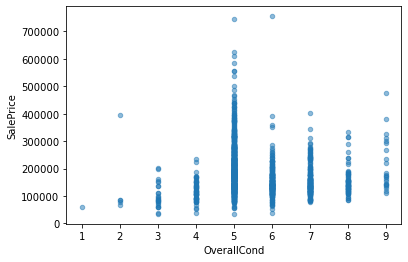

In [6]:
#Visualizing data
import matplotlib.pyplot as plt
train_df.plot.scatter(y="SalePrice", x="OverallCond",alpha=0.5)

In [7]:
print("List of features contained our dataset:",list(train.columns))

List of features contained our dataset: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [8]:
y_train=train_df['SalePrice']
x_train=train_df.drop(['SalePrice'],axis=1)

<AxesSubplot:>

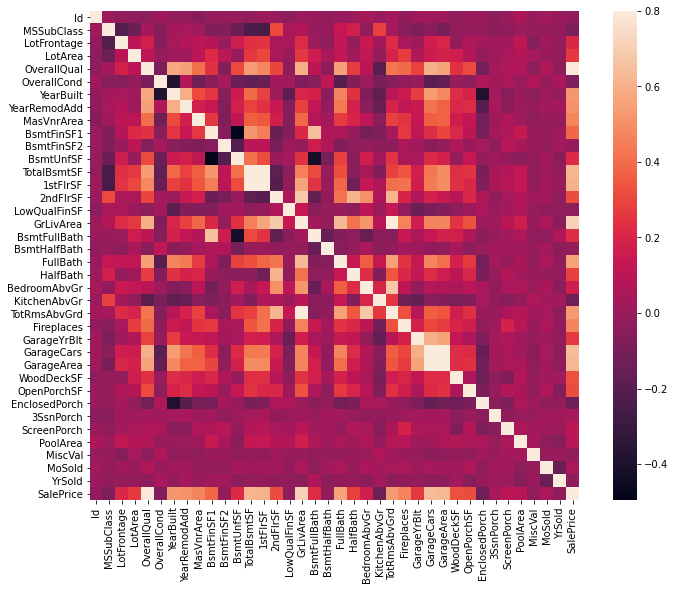

In [9]:
#check the correlation between different features 
corr = train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax = .8, square = True)

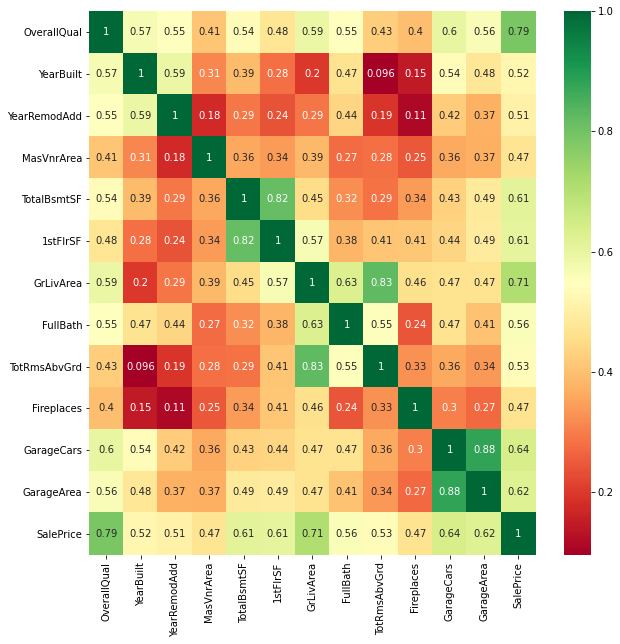

In [10]:
#check correlation between different features
high_corr = train.corr()
high_corr_features = high_corr.index[abs(high_corr["SalePrice"])>0.4]

plt.figure(figsize=(10,10))
mat = sns.heatmap(train[high_corr_features].corr(), annot=True, cmap="RdYlGn")

In [11]:
#take only the highly correlated features
High_corr_sale = pd.Series(high_corr["SalePrice"].sort_values(ascending=False))
features = High_corr_sale[High_corr_sale.between(0.4, 1)]
print (features)

features = features.index

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
Name: SalePrice, dtype: float64


In [12]:
ftr=[ 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces']

In [13]:
#now keep only the high correlated features
x_test=test_df
x_train=x_train[ftr]
x_test=x_test[ftr]

In [14]:
#drop high correlated features
x_train=x_train.drop(['GarageCars','TotalBsmtSF','TotRmsAbvGrd'],axis=1)
x_test=x_test.drop(['GarageCars','TotalBsmtSF','TotRmsAbvGrd'],axis=1)

In [15]:
X_train=x_train[0:1200]
x_val=x_train[1200:1460]
Y_train=y_train[0:1200]
y_val=y_train[1200:1460]

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
#train model with ridge regression
from sklearn.linear_model import Ridge
import numpy as np
modelR = Ridge(alpha=.4)
modelR=modelR.fit(x_train, y_train)
y_pred=modelR.predict(x_test)
output = pd.DataFrame({'Id': ID, 'SalePrice': y_pred})
output
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")

Your submission was saved!


In [18]:
#lasso regression
from sklearn import linear_model
modelL = linear_model.Lasso(alpha=0.5)
modelL=modelL.fit(x_train, y_train)
y_pred=modelL.predict(x_test)
output = pd.DataFrame({'Id': ID, 'SalePrice': y_pred})
output
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")
output = pd.DataFrame({'Id': ID, 'SalePrice': y_pred})
output
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")

Your submission was saved!
Your submission was saved!


In [19]:
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear=model_linear.fit(x_train, y_train)
y_pred=model_linear.predict(x_test)
output = pd.DataFrame({'Id': ID, 'SalePrice': y_pred})
output
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")

Your submission was saved!


In [20]:
#elastic regression
from sklearn.linear_model import ElasticNet
modelE= ElasticNet(random_state=0)
modelE=modelE.fit(x_train, y_train)
y_pred=modelE.predict(x_test)
output = pd.DataFrame({'Id': ID, 'SalePrice': y_pred})
output
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")

Your submission was saved!
